This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

In [ ]:
!pip install ISLP

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

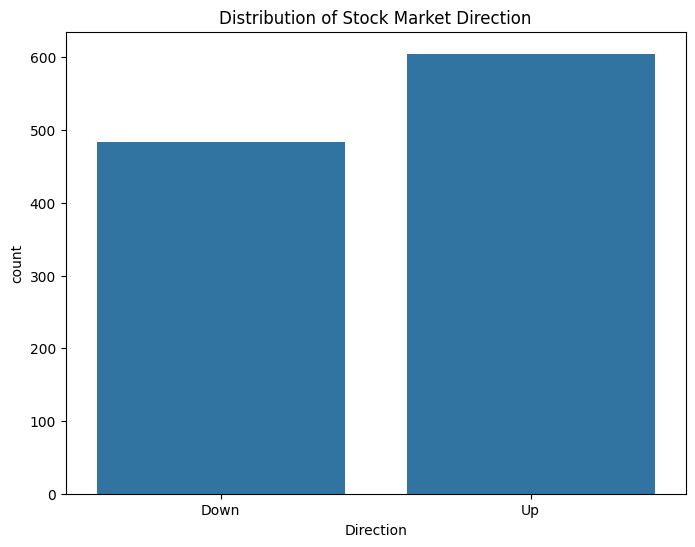

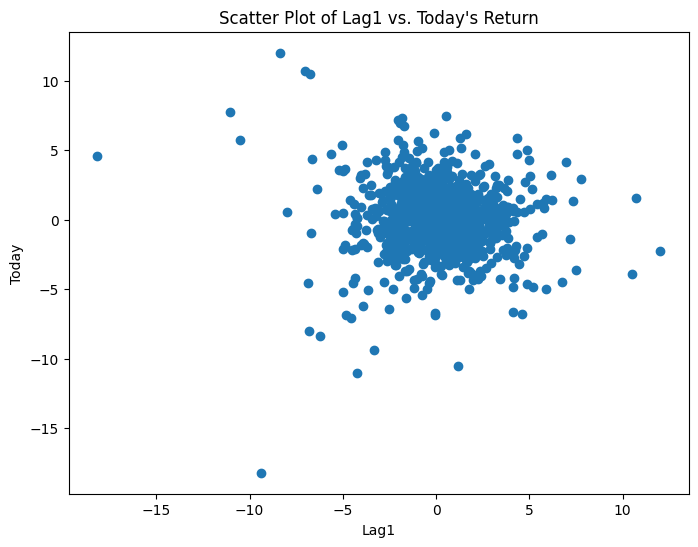

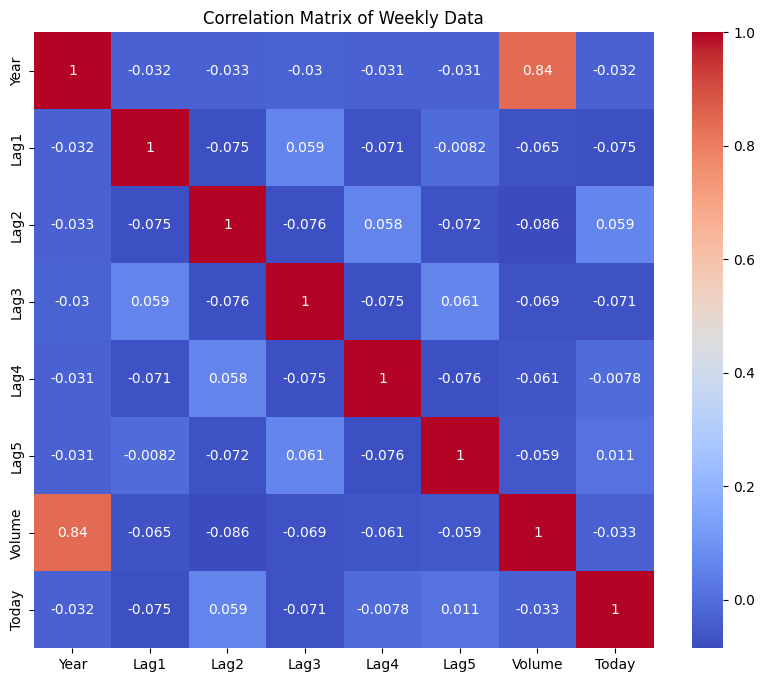

In [ ]:

from ISLP import load_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Weekly dataset
weekly_data = load_data('Weekly')

# Numerical summaries
print(weekly_data.describe())

# Graphical summaries
# Histogram of the Direction variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Direction', data=weekly_data)
plt.title('Distribution of Stock Market Direction')
plt.show()

# Scatter plot of Lag1 vs. Today's Return
plt.figure(figsize=(8, 6))
plt.scatter(weekly_data['Lag1'], weekly_data['Today'])
plt.xlabel('Lag1')
plt.ylabel('Today')
plt.title('Scatter Plot of Lag1 vs. Today\'s Return')
plt.show()

# Correlation matrix
# Select numerical columns
numerical_data = weekly_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weekly Data')
plt.show()


# Potential patterns:
# - The distribution of the Direction variable may show a tendency for the market
#   to move in a particular direction more frequently.
# - A scatter plot of Lag1 vs. Today's Return could indicate if there's a relationship
#   between the previous week's return and the current week's return.
# - The correlation matrix can reveal relationships between different variables,
#   including the lagged returns and the volume of shares traded.


Potential patterns:
- The distribution of the Direction variable may show a tendency for the market
  to move in a particular direction more frequently.
- A scatter plot of Lag1 vs. Today's Return could indicate if there's a relationship
  between the previous week's return and the current week's return.
- The correlation matrix can reveal relationships between different variables,
  including the lagged returns and the volume of shares traded.

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [ ]:
import statsmodels.api as sm

# Define the predictors and the response variable
X = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
weekly_data['Direction_Numeric'] = weekly_data['Direction'].map({'Up': 1, 'Down': 0})

# Check for NaN values and replace with a suitable value (e.g., 0)
weekly_data['Direction_Numeric'].fillna(0, inplace=True)

# Use the numeric column for the response variable
y = weekly_data['Direction_Numeric']

# Add a constant to the predictors (required for logistic regression)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Direction_Numeric   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        09:30:53   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

<ipython-input-16-159a53a52356>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weekly_data['Direction_Numeric'].fillna(0, inplace=True)


Interpretation:
Look at the p-values in the summary output.
Predictors with p-values below a certain threshold (e.g., 0.05) are considered statistically significant.
In this context, it appears that none of the predictors are statistically significant at the conventional 0.05 level
as their p-values are greater than 0.05

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Get the predicted probabilities for the 'Up' class
y_pred_prob = model.predict(X)

# Convert probabilities to predicted classes (using a threshold of 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)

# Calculate the overall accuracy
accuracy = accuracy_score(y, y_pred)
print("Overall Accuracy:", accuracy)


Confusion Matrix:
[[ 54 430]
 [ 48 557]]
Overall Accuracy: 0.5610651974288338


(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [ ]:
# Create a boolean mask for the training data (1990-2008)
train_mask = weekly_data.Year <= 2008

# Create a boolean mask for the test data (2009-2010)
test_mask = weekly_data.Year >= 2009

# Split the data into training and testing sets
X_train = weekly_data.loc[train_mask, ['Lag2']]
y_train = weekly_data.loc[train_mask, 'Direction_Numeric']
X_test = weekly_data.loc[test_mask, ['Lag2']]
y_test = weekly_data.loc[test_mask, 'Direction_Numeric']

# Add a constant to the training predictors
X_train = sm.add_constant(X_train)

# Fit the logistic regression model using the training data
model_d = sm.Logit(y_train, X_train).fit()

# Add a constant to the test predictors
X_test = sm.add_constant(X_test)

# Make predictions on the test data
y_pred_prob_d = model_d.predict(X_test)
y_pred_d = (y_pred_prob_d > 0.5).astype(int)

# Calculate the confusion matrix for the test data
cm_d = confusion_matrix(y_test, y_pred_d)
print("Confusion Matrix (Held-out data):")
print(cm_d)

# Calculate the accuracy for the test data
accuracy_d = accuracy_score(y_test, y_pred_d)
print("Overall Accuracy (Held-out data):", accuracy_d)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix (Held-out data):
[[ 9 34]
 [ 5 56]]
Overall Accuracy (Held-out data): 0.625


(e) Repeat (d) using LDA.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score


# Split the data into training and testing sets (same as in part (d))
X_train = weekly_data.loc[train_mask, ['Lag2']]
y_train = weekly_data.loc[train_mask, 'Direction_Numeric']
X_test = weekly_data.loc[test_mask, ['Lag2']]
y_test = weekly_data.loc[test_mask, 'Direction_Numeric']

# Fit the LDA model using the training data
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lda = lda_model.predict(X_test)

# Calculate the confusion matrix for the test data
cm_lda = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix (Held-out data, LDA):")
print(cm_lda)

# Calculate the accuracy for the test data
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Overall Accuracy (Held-out data, LDA):", accuracy_lda)

Confusion Matrix (Held-out data, LDA):
[[ 9 34]
 [ 5 56]]
Overall Accuracy (Held-out data, LDA): 0.625


(f) Repeat (d) using QDA.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Split the data into training and testing sets (same as in part (d))
X_train = weekly_data.loc[train_mask, ['Lag2']]
y_train = weekly_data.loc[train_mask, 'Direction_Numeric']
X_test = weekly_data.loc[test_mask, ['Lag2']]
y_test = weekly_data.loc[test_mask, 'Direction_Numeric']

# Fit the QDA model using the training data
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_qda = qda_model.predict(X_test)

# Calculate the confusion matrix for the test data
cm_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix (Held-out data, QDA):")
print(cm_qda)

# Calculate the accuracy for the test data
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("Overall Accuracy (Held-out data, QDA):", accuracy_qda)

Confusion Matrix (Held-out data, QDA):
[[ 0 43]
 [ 0 61]]
Overall Accuracy (Held-out data, QDA): 0.5865384615384616


(g) Repeat (d) using KNN with K = 1.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets (same as in part (d))
X_train = weekly_data.loc[train_mask, ['Lag2']]
y_train = weekly_data.loc[train_mask, 'Direction_Numeric']
X_test = weekly_data.loc[test_mask, ['Lag2']]
y_test = weekly_data.loc[test_mask, 'Direction_Numeric']

# Fit the KNN model with K=1 using the training data
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate the confusion matrix for the test data
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (Held-out data, KNN with K=1):")
print(cm_knn)

# Calculate the accuracy for the test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Overall Accuracy (Held-out data, KNN with K=1):", accuracy_knn)

Confusion Matrix (Held-out data, KNN with K=1):
[[22 21]
 [32 29]]
Overall Accuracy (Held-out data, KNN with K=1): 0.49038461538461536


(h) Repeat (d) using naive Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets (same as in part (d))
X_train = weekly_data.loc[train_mask, ['Lag2']]
y_train = weekly_data.loc[train_mask, 'Direction_Numeric']
X_test = weekly_data.loc[test_mask, ['Lag2']]
y_test = weekly_data.loc[test_mask, 'Direction_Numeric']

# Fit the Naive Bayes model using the training data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test)

# Calculate the confusion matrix for the test data
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Held-out data, Naive Bayes):")
print(cm_nb)

# Calculate the accuracy for the test data
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Overall Accuracy (Held-out data, Naive Bayes):", accuracy_nb)

Confusion Matrix (Held-out data, Naive Bayes):
[[ 0 43]
 [ 0 61]]
Overall Accuracy (Held-out data, Naive Bayes): 0.5865384615384616


(i) Which of these methods appears to provide the best results on
this data?

LDA and Logistic Regression

(j) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [ ]:
# Load the Weekly dataset
weekly_data = load_data('Weekly')

# Create a numeric 'Direction' column
weekly_data['Direction_Numeric'] = weekly_data['Direction'].map({'Up': 1, 'Down': 0})

# Split the data into training and testing sets (using 2009-2010 as the test set)
train_mask = weekly_data.Year <= 2008
test_mask = weekly_data.Year >= 2009
X_train = weekly_data.loc[train_mask, ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = weekly_data.loc[train_mask, 'Direction_Numeric']
X_test = weekly_data.loc[test_mask, ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_test = weekly_data.loc[test_mask, 'Direction_Numeric']


def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  return cm, accuracy


# Experiment with different methods and predictors
results = {}

# Logistic Regression
model_log = sm.Logit(y_train, sm.add_constant(X_train)).fit()
y_pred_prob = model_log.predict(sm.add_constant(X_test))
y_pred = (y_pred_prob > 0.5).astype(int)
cm_log = confusion_matrix(y_test, y_pred)
accuracy_log = accuracy_score(y_test, y_pred)
results['Logistic Regression (Lag1-Lag5, Volume)'] = (cm_log, accuracy_log)


# LDA
lda_model = LinearDiscriminantAnalysis()
cm_lda, accuracy_lda = evaluate_model(lda_model, X_train, y_train, X_test, y_test)
results['LDA (Lag1-Lag5, Volume)'] = (cm_lda, accuracy_lda)

# QDA
qda_model = QuadraticDiscriminantAnalysis()
cm_qda, accuracy_qda = evaluate_model(qda_model, X_train, y_train, X_test, y_test)
results['QDA (Lag1-Lag5, Volume)'] = (cm_qda, accuracy_qda)

# KNN
for k in [1, 3, 5, 7]:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  cm_knn, accuracy_knn = evaluate_model(knn_model, X_train, y_train, X_test, y_test)
  results[f'KNN (k={k}, Lag1-Lag5, Volume)'] = (cm_knn, accuracy_knn)

# Naive Bayes
nb_model = GaussianNB()
cm_nb, accuracy_nb = evaluate_model(nb_model, X_train, y_train, X_test, y_test)
results['Naive Bayes (Lag1-Lag5, Volume)'] = (cm_nb, accuracy_nb)


# Find the best performing model
best_model = max(results, key=lambda k: results[k][1])
print(f"Best Model: {best_model}")
print(f"Confusion Matrix: \n{results[best_model][0]}")
print(f"Accuracy: {results[best_model][1]}")

Optimization terminated successfully.
         Current function value: 0.681388
         Iterations 4
Best Model: KNN (k=7, Lag1-Lag5, Volume)
Confusion Matrix: 
[[19 24]
 [26 35]]
Accuracy: 0.5192307692307693
